# Import Modules

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import KMeans,DBSCAN,MeanShift,SpectralClustering,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data Ingestion

In [2]:
country_df=pd.read_csv("Country-data.csv")
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# EDA

### Data Info

In [36]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    int32  
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 12.5 KB


In [4]:
duplicate=country_df.duplicated().sum()
duplicate[duplicate>0]

array([], dtype=int64)

### Statistical Info

In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country_df.describe(include="object")

,country
count,167
unique,167
top,Afghanistan
freq,1


### Analysis

### Univariate

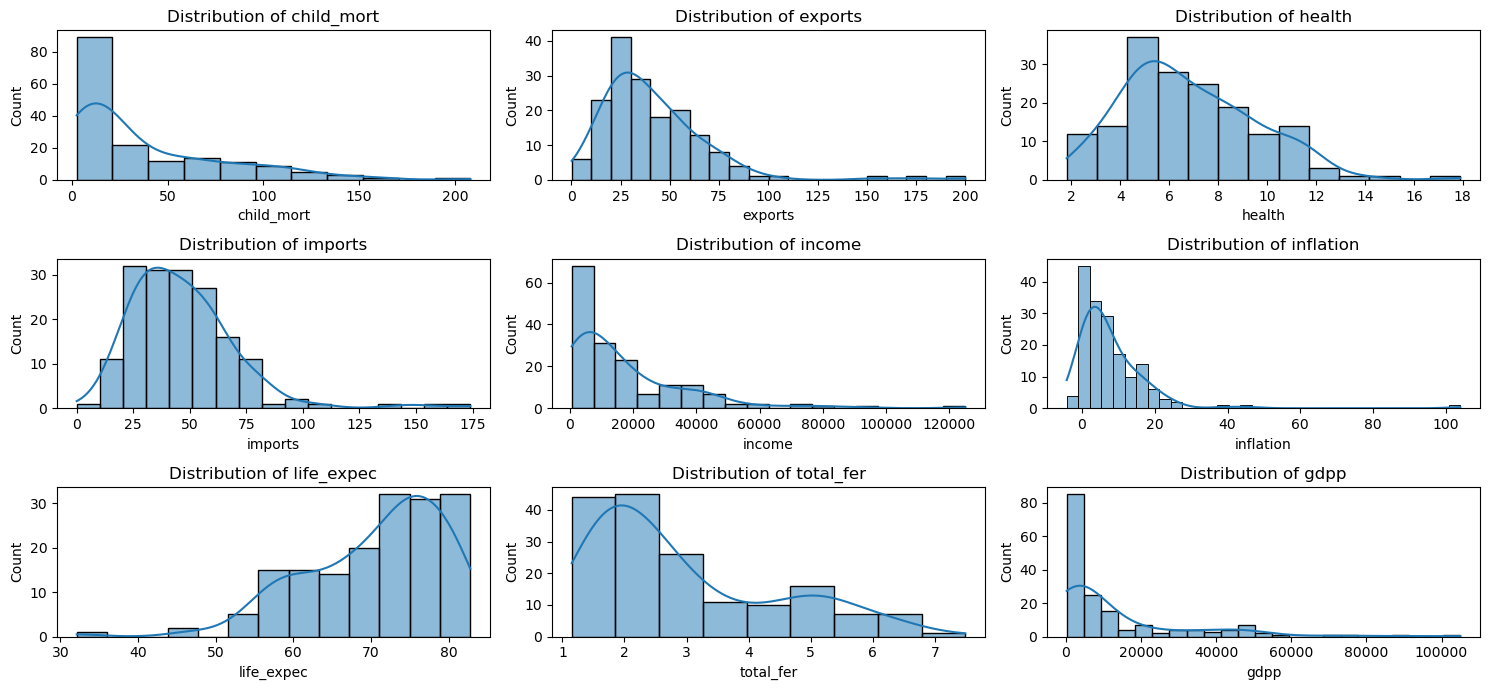

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
axes = axes.flatten()
for i, col in enumerate(country_df.select_dtypes(include="number").columns):
    sns.histplot(country_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<AxesSubplot:>

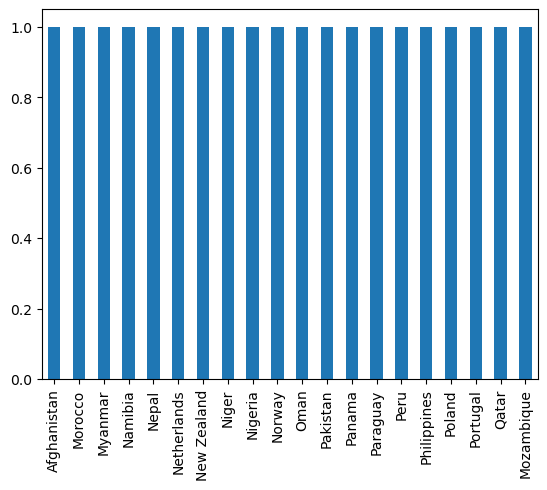

In [9]:
country_df["country"].value_counts(ascending = False).head(20).plot(kind = 'bar')

### Bivariate

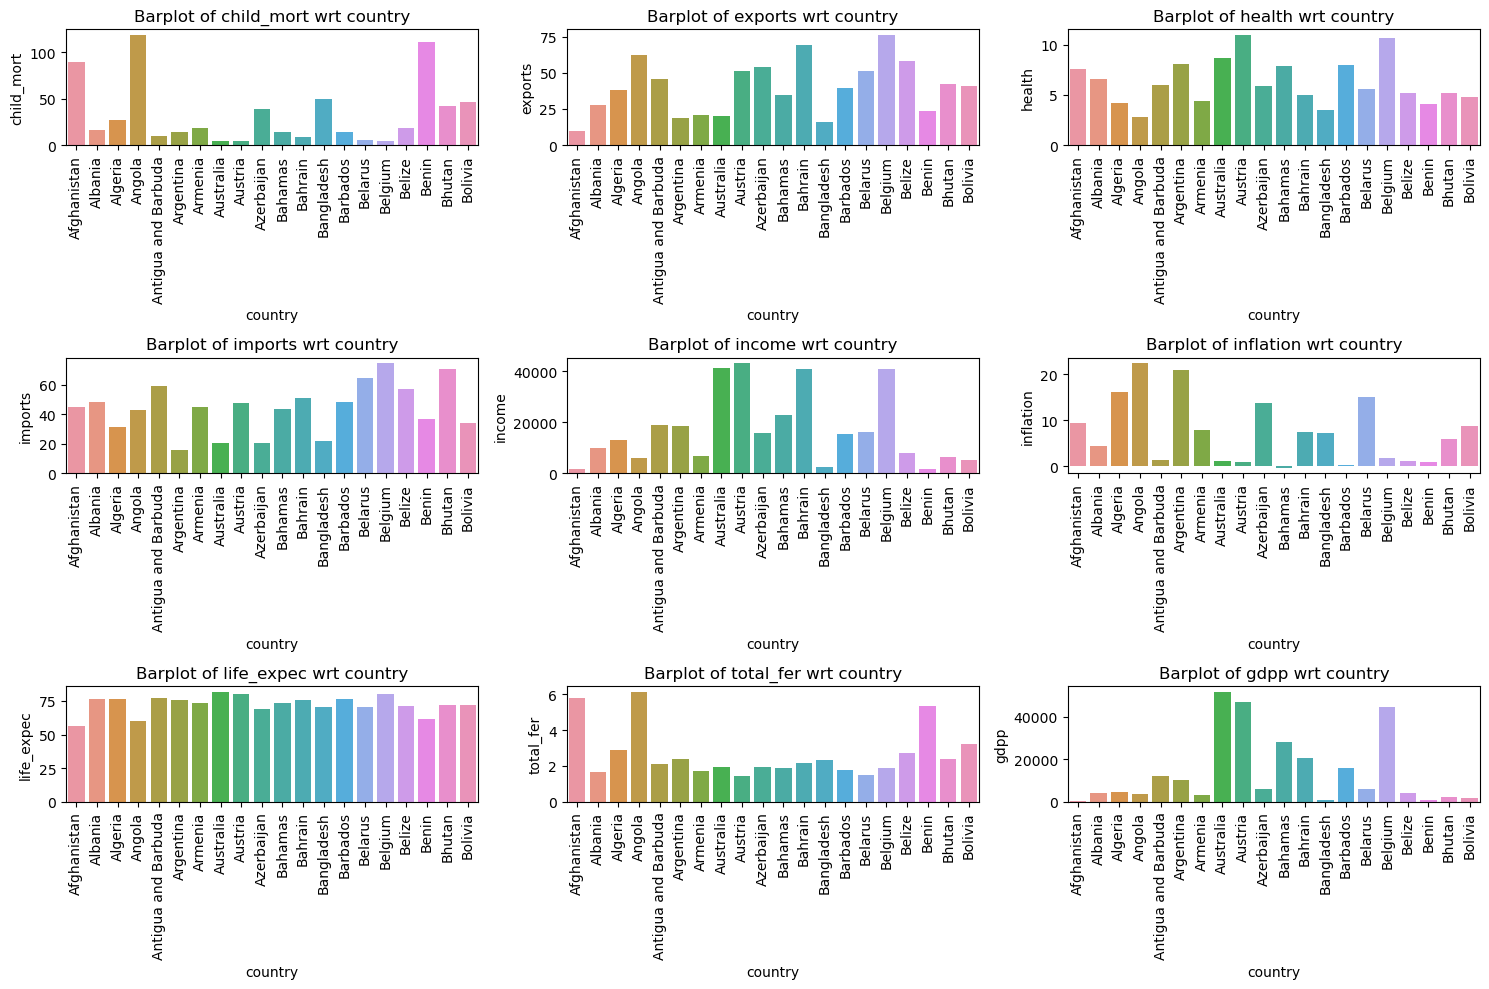

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(country_df.select_dtypes(include="number").columns):
    sns.barplot(data=country_df.head(20), y=col, x="country", ax=axes[i])
    axes[i].set_title(f'Barplot of {col} wrt country')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

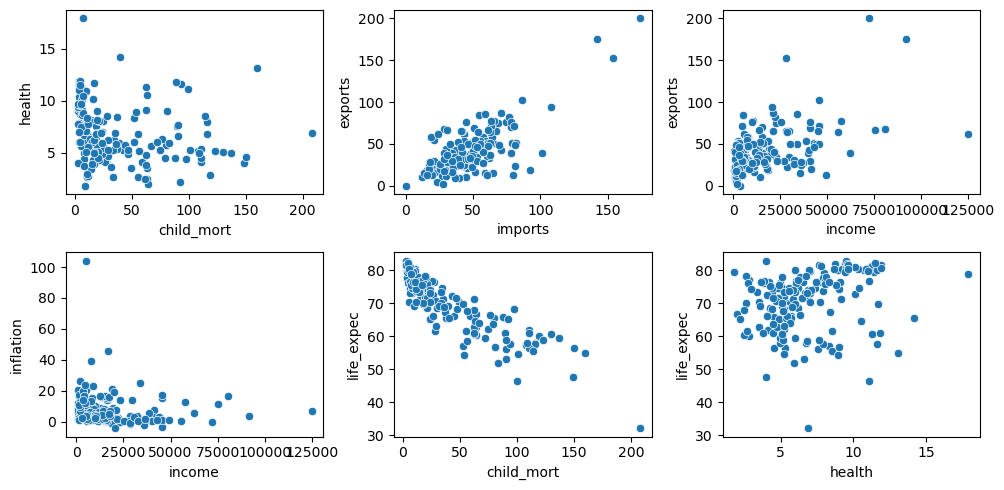

In [14]:
fig,axes=plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten()
sns.scatterplot(data=country_df,x="child_mort",y='health',ax=axes[0])
sns.scatterplot(data=country_df,x="imports",y='exports',ax=axes[1])
sns.scatterplot(data=country_df,x="income",y='exports',ax=axes[2])
sns.scatterplot(data=country_df,x="income",y='inflation',ax=axes[3])
sns.scatterplot(data=country_df,x="child_mort",y='life_expec',ax=axes[4])
sns.scatterplot(data=country_df,x="health",y='life_expec',ax=axes[5])
plt.tight_layout()
plt.show()

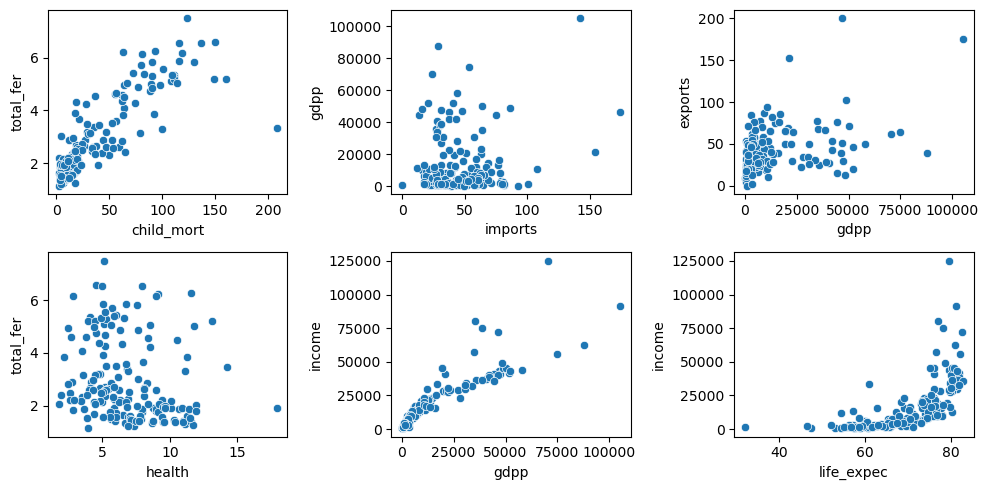

In [24]:
fig,axes=plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten()
sns.scatterplot(data=country_df,x="child_mort",y='total_fer',ax=axes[0])
sns.scatterplot(data=country_df,x="imports",y='gdpp',ax=axes[1])
sns.scatterplot(data=country_df,x="gdpp",y='exports',ax=axes[2])
sns.scatterplot(data=country_df,x="health",y='total_fer',ax=axes[3])
sns.scatterplot(data=country_df,x="gdpp",y='income',ax=axes[4])
sns.scatterplot(data=country_df,x="life_expec",y='income',ax=axes[5])
plt.tight_layout()
plt.show()

### Multivariate

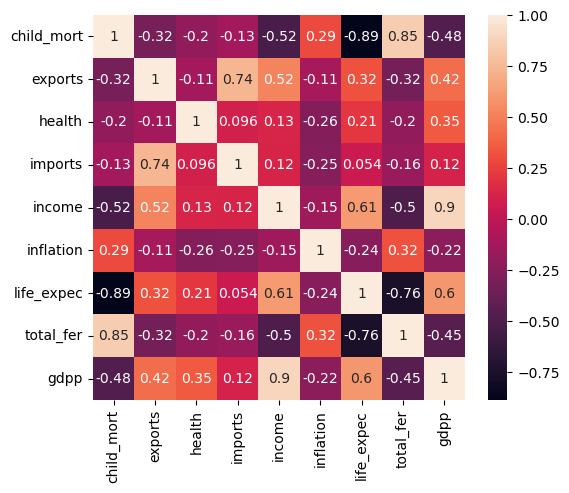

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(country_df.select_dtypes(include="number").corr(),annot=True)
plt.show()

### Outlier Detection

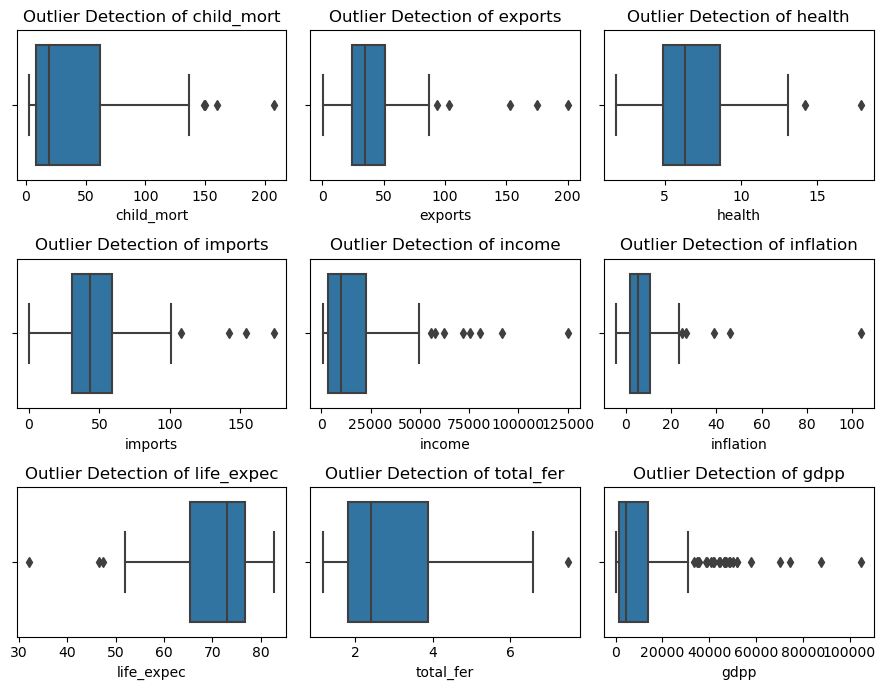

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(9, 7))
axes = axes.flatten()
for i, col in enumerate(country_df.select_dtypes(include="number").columns):
    sns.boxplot(country_df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection of {col}')
plt.tight_layout()
plt.show()

# Feature Engineering

### Outlier Handling

In [3]:
def handle_outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    df[col]=df[col].clip(l,u)

In [4]:
for col in country_df.select_dtypes(include="number").columns:
    #print(col)
    handle_outlier(country_df,col)

### Data Transformation

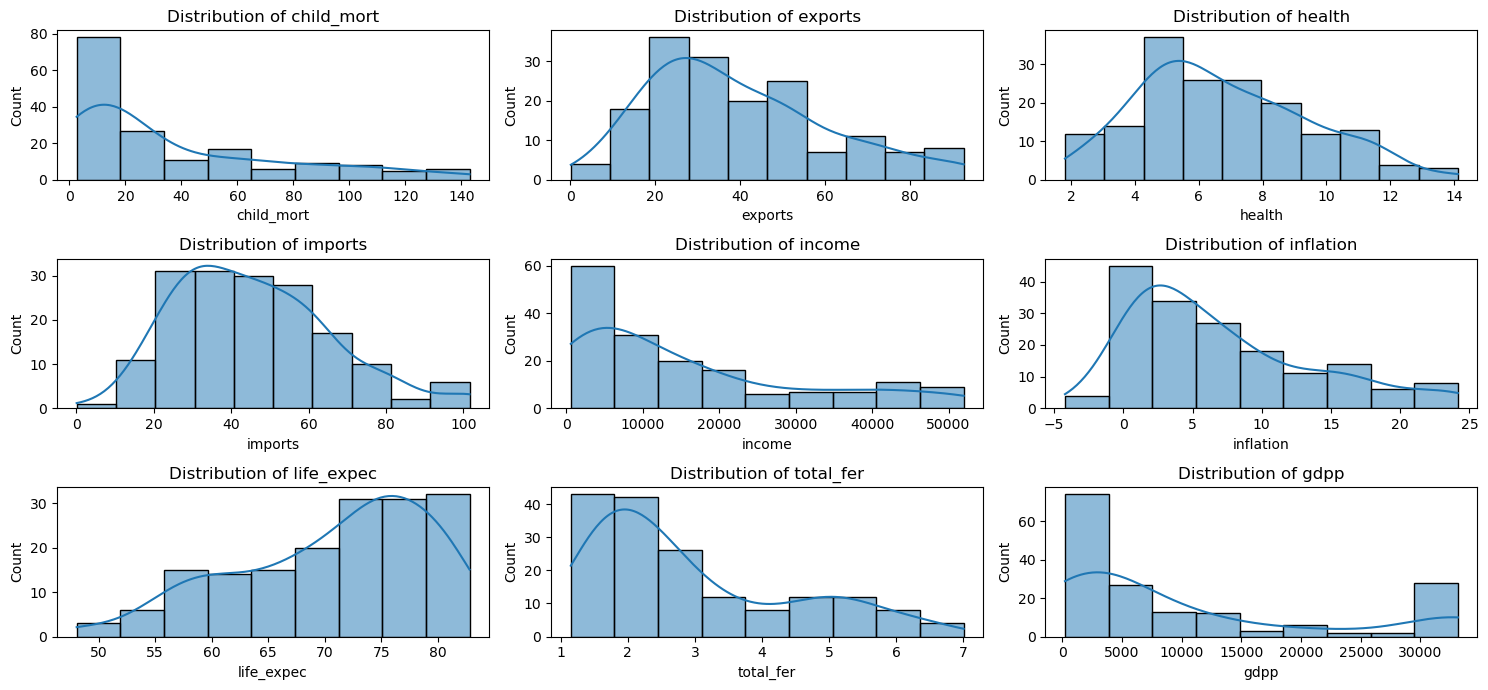

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
axes = axes.flatten()
for i, col in enumerate(country_df.select_dtypes(include="number").columns):
    sns.histplot(country_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### Right skew

In [36]:
right_skew=country_df.select_dtypes(include="number").columns.drop(["life_expec"])
pt=PowerTransformer(method="yeo-johnson")
quantile = QuantileTransformer(output_distribution='normal', random_state=0)

In [37]:
right_skew

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'total_fer', 'gdpp'],
      dtype='object')

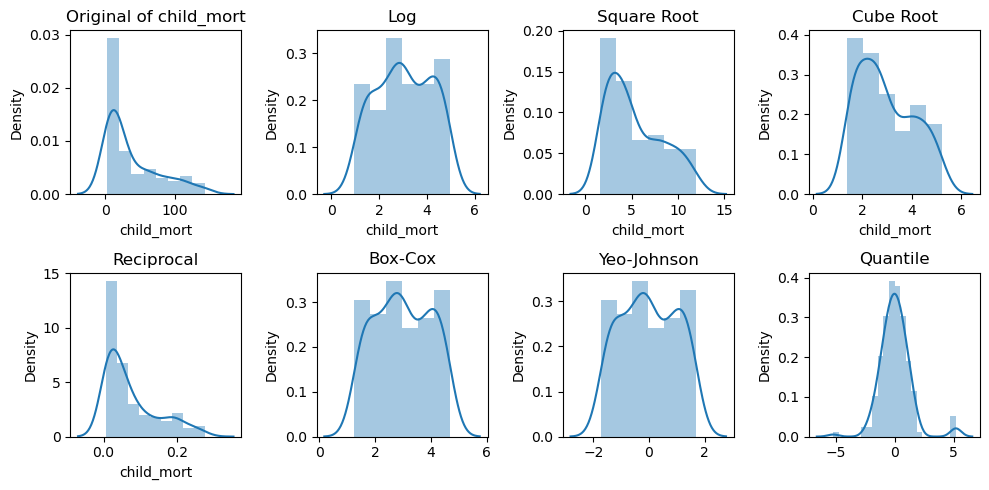

In [39]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["child_mort"],ax=axes[0,0]).set_title('Original of child_mort')
sns.distplot(np.log(country_df["child_mort"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["child_mort"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["child_mort"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["child_mort"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["child_mort"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["child_mort"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["child_mort"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [5]:
box_cox_dfz,_=stats.boxcox(country_df["child_mort"])
country_df["child_mort"]=box_cox_dfz

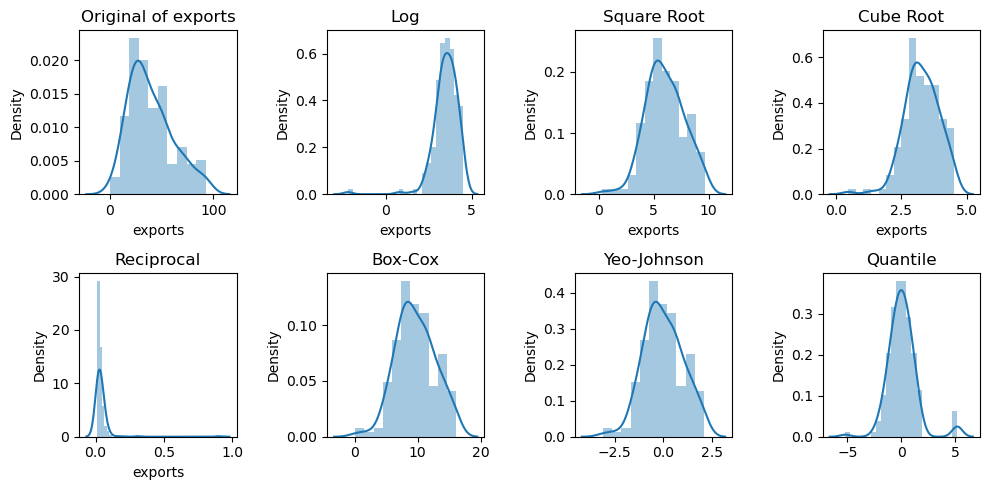

In [41]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["exports"],ax=axes[0,0]).set_title('Original of exports')
sns.distplot(np.log(country_df["exports"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["exports"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["exports"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["exports"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["exports"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["exports"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["exports"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [6]:
box_cox_dfz,_=stats.boxcox(country_df["exports"])
country_df["exports"]=box_cox_dfz

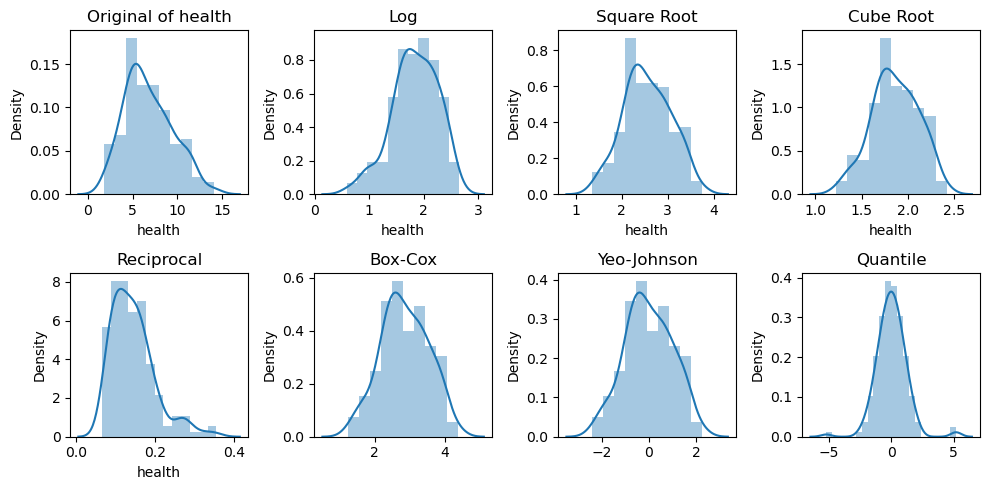

In [43]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["health"],ax=axes[0,0]).set_title('Original of health')
sns.distplot(np.log(country_df["health"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["health"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["health"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["health"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["health"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["health"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["health"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [7]:
box_cox_dfz,_=stats.boxcox(country_df["health"])
country_df["health"]=box_cox_dfz

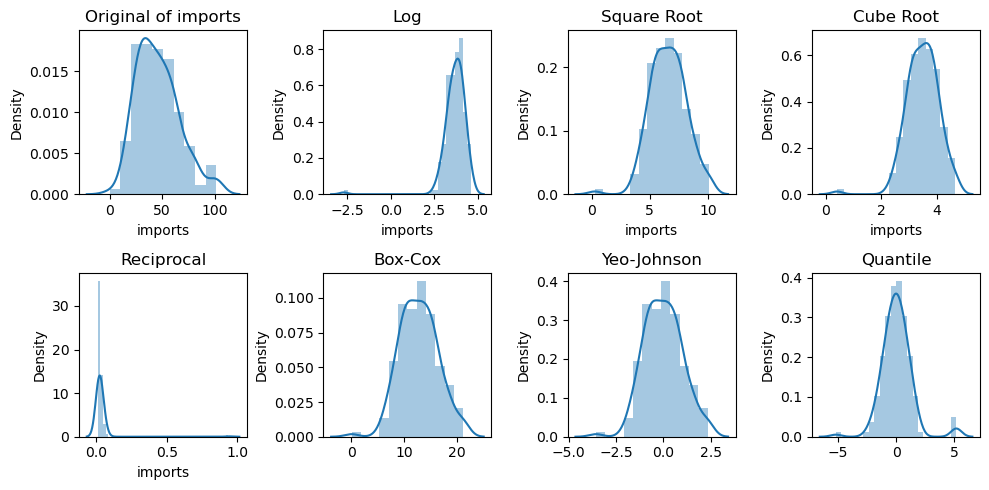

In [45]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["imports"],ax=axes[0,0]).set_title('Original of imports')
sns.distplot(np.log(country_df["imports"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["imports"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["imports"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["imports"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["imports"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["imports"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["imports"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [8]:
box_cox_dfz,_=stats.boxcox(country_df["imports"])
country_df["imports"]=box_cox_dfz

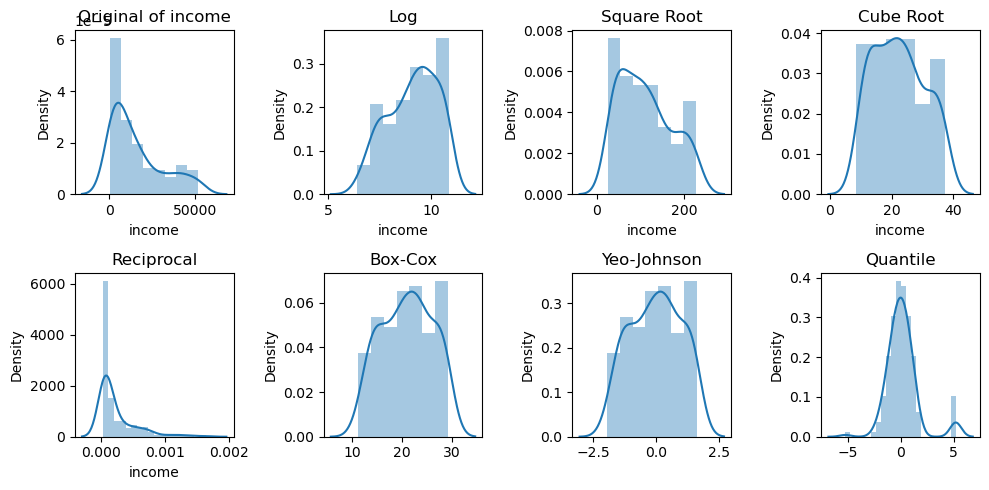

In [47]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["income"],ax=axes[0,0]).set_title('Original of income')
sns.distplot(np.log(country_df["income"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["income"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["income"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["income"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["income"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["income"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["income"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [9]:
box_cox_dfz,_=stats.boxcox(country_df["income"])
country_df["income"]=box_cox_dfz

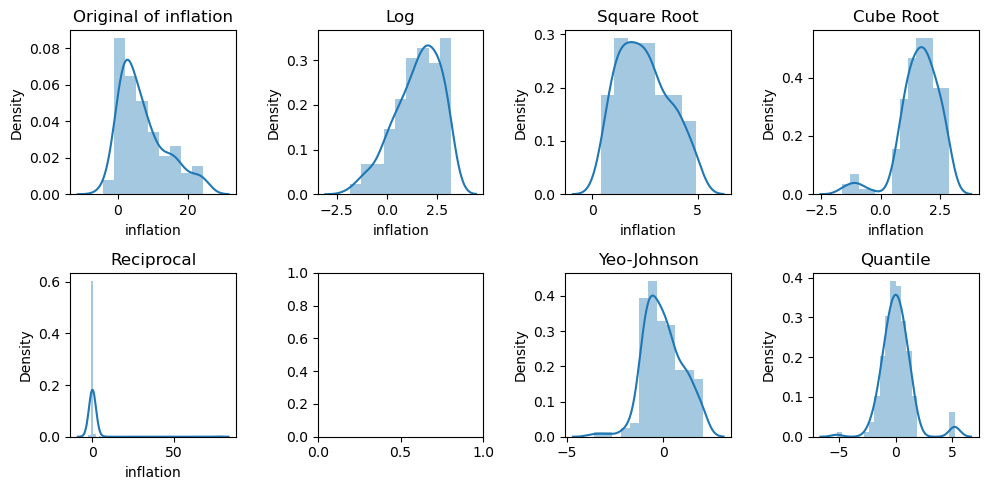

In [51]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["inflation"],ax=axes[0,0]).set_title('Original of inflation')
sns.distplot(np.log(country_df["inflation"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["inflation"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["inflation"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["inflation"]+1),ax=axes[1,0]).set_title('Reciprocal')
#box_cox_dfz,_=stats.boxcox(country_df["inflation"]+1)
#sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["inflation"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["inflation"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [10]:
country_df["inflation"]=np.sqrt(country_df["inflation"])

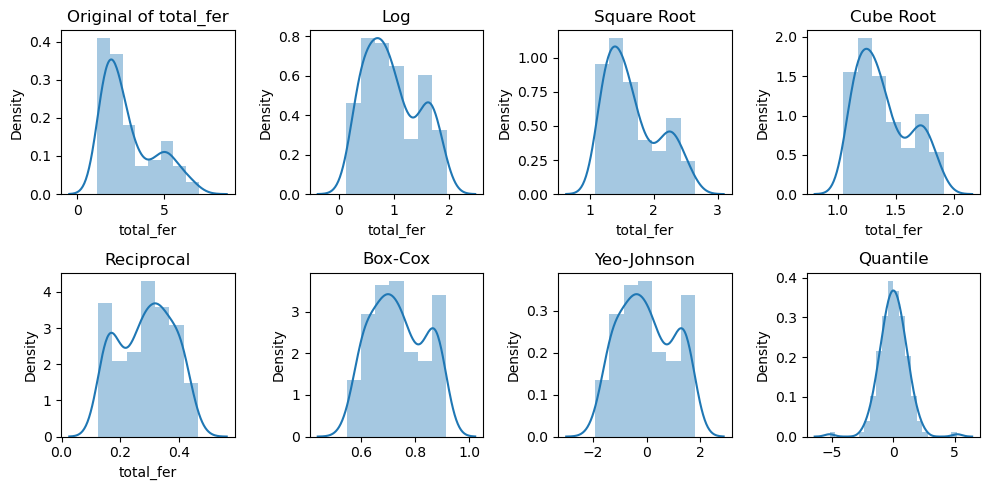

In [53]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["total_fer"],ax=axes[0,0]).set_title('Original of total_fer')
sns.distplot(np.log(country_df["total_fer"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["total_fer"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["total_fer"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["total_fer"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["total_fer"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["total_fer"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["total_fer"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [11]:
box_cox_dfz,_=stats.boxcox(country_df["total_fer"])
country_df["total_fer"]=box_cox_dfz

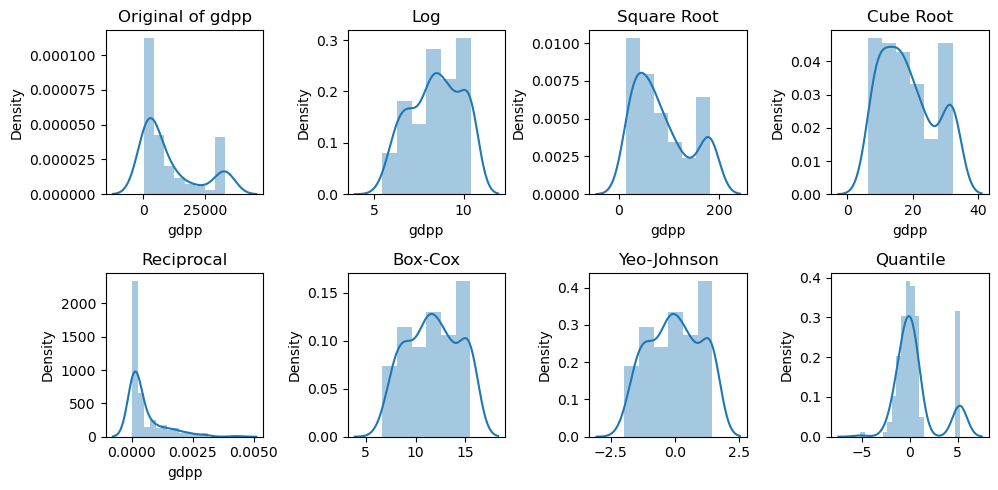

In [55]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(country_df["gdpp"],ax=axes[0,0]).set_title('Original of gdpp')
sns.distplot(np.log(country_df["gdpp"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(country_df["gdpp"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(country_df["gdpp"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(country_df["gdpp"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["gdpp"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["gdpp"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["gdpp"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [12]:
box_cox_dfz,_=stats.boxcox(country_df["gdpp"]+1)
country_df["gdpp"]=box_cox_dfz

##### Left skew

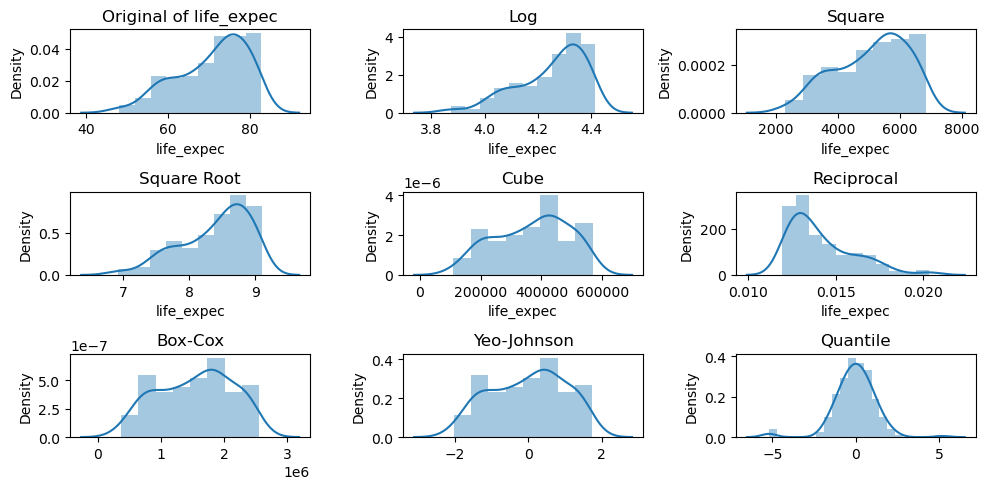

In [59]:
fig, axes = plt.subplots(3,3, figsize=(10, 5))
sns.distplot(country_df["life_expec"],ax=axes[0,0]).set_title('Original of life_expec')
sns.distplot(np.log(country_df["life_expec"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot((country_df["life_expec"])**2,ax=axes[0,2]).set_title('Square')
sns.distplot(np.sqrt(country_df["life_expec"]),ax=axes[1,0]).set_title('Square Root')
sns.distplot((country_df["life_expec"])**3,ax=axes[1,1]).set_title('Cube')
sns.distplot(1/(country_df["life_expec"]+1),ax=axes[1,2]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(country_df["life_expec"]+1)
sns.distplot(box_cox_dfz,ax=axes[2,0]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(country_df[["life_expec"]])
sns.distplot(yoe_dfz,ax=axes[2,1]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(country_df["life_expec"]))
sns.distplot(quantile_dfz,ax=axes[2,2]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [13]:
box_cox_dfz,_=stats.boxcox(country_df["life_expec"])
country_df["life_expec"]=box_cox_dfz

### Encoding

In [14]:
le=LabelEncoder()
country_df["country"]=le.fit_transform(country_df["country"])

### Null Value Handling

In [43]:
knn_imputer = KNNImputer(n_neighbors=10)
country_df["inflation"]=knn_imputer.fit_transform(country_df[["inflation"]])

In [47]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    int32  
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 12.5 KB


# Feature Selection

### Feature Selection using Variance Threshold (VarianceThreshold)

In [236]:
vt = VarianceThreshold(threshold=0.3)
country_df_vt = vt.fit_transform(country_df)
selected_features_mask_vt = vt.get_support()
selected_features_vt = country_df.columns[selected_features_mask_vt]
country_vt_df = pd.DataFrame(country_df[selected_features_vt])
country_vt_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,gdpp
0,0,4.712387,4.448094,3.198075,14.239127,14.091023,3.072458,5.132844e+05,7.999384
1,1,2.890382,8.964328,2.865623,14.999258,20.947586,2.118962,1.533752e+06,11.388835
2,2,3.419464,10.909554,1.958085,11.214784,22.107829,4.012481,1.548194e+06,11.546930
3,3,5.016620,14.584927,1.316396,13.817510,18.778371,4.732864,6.526436e+05,11.122297
4,4,2.387767,12.094182,2.686207,16.998663,23.941405,1.200000,1.570040e+06,13.458219
...,...,...,...,...,...,...,...,...,...
162,162,3.491427,12.269545,2.399409,15.814243,16.156191,1.618641,7.725863e+05,10.813215
163,163,2.921794,9.065081,2.266668,7.486967,23.244303,4.915282,1.469962e+06,13.658328
164,164,3.250392,15.876245,2.962115,20.722393,17.710487,3.478505,1.315647e+06,9.400024
165,165,4.198771,9.362362,2.372496,11.927052,17.701959,4.857983,9.890512e+05,9.400024


### Feature Selection using PCA

In [237]:
pca = PCA(n_components=7)
country_df_pca = pca.fit_transform(country_df)
country_pca_df=pd.DataFrame(country_df_pca)
country_pca_df

,0,1,2,3,4,5,6
0,726829.348288,-81.928123,2.249105,-2.212109,2.709076,1.144446,-0.047675
1,-293638.440098,-82.430282,1.076860,-3.985316,-0.064842,0.589102,-0.392983
2,-308080.385733,-81.460284,2.704936,-0.519636,-2.997173,1.325558,-0.167428
3,587470.214469,-79.125326,-4.103334,5.065432,-2.337602,0.834938,0.051531
4,-329926.704024,-79.478609,-2.925668,-1.334657,0.810809,-0.256959,-0.691894
...,...,...,...,...,...,...,...
162,467527.525302,79.699660,-2.959652,0.218344,-0.519550,-1.795264,0.011510
163,-229848.486589,79.637155,6.591043,3.211110,-1.574616,1.537871,0.386170
164,-75533.392363,80.925565,-7.097331,-4.847159,-3.679332,0.497451,0.735193
165,251062.606089,82.368149,2.561794,0.032713,-1.904413,1.530578,0.308190


# Scaling

### MinMax Scaling

In [238]:
minmax=MinMaxScaler()

#####  MinMax Scaling for Features Selected using Variance Threshold (VarianceThreshold)

In [239]:
country_vt_df_scale=minmax.fit_transform(country_vt_df)
#country_vt_df_scale=minmax.transform(country_vt_df)
country_vt_df_scale

array([[0.        , 0.88105911, 0.29268777, ..., 0.59186959, 0.12503722,
        0.15062704],
       [0.0060241 , 0.45270941, 0.52204902, ..., 0.38069868, 0.70407519,
        0.53455626],
       [0.01204819, 0.57709549, 0.62083923, ..., 0.80005641, 0.7122699 ,
        0.55246394],
       ...,
       [0.98795181, 0.53734705, 0.87307742, ..., 0.68179689, 0.58031714,
        0.30927999],
       [0.9939759 , 0.76030908, 0.54226358, ..., 0.98730995, 0.39499872,
        0.30927999],
       [1.        , 0.85997325, 0.6083629 , ..., 0.74007718, 0.05433262,
        0.32993866]])

#####  MinMax Scaling for Features Selected using PCA

In [240]:
country_pca_df_scale=minmax.fit_transform(country_pca_df)
country_pca_df_scale=minmax.transform(country_pca_df)
country_pca_df_scale

array([[0.87496278, 0.00301272, 0.46897951, ..., 0.72192838, 0.67326559,
        0.46860819],
       [0.29592481, 0.        , 0.43202236, ..., 0.40845907, 0.56429934,
        0.38377529],
       [0.2877301 , 0.00581955, 0.4833504 , ..., 0.07708807, 0.7088023 ,
        0.43918823],
       ...,
       [0.41968286, 0.98006016, 0.17431627, ..., 0.        , 0.5463161 ,
        0.66093781],
       [0.60500128, 0.988715  , 0.47883758, ..., 0.20057644, 0.74903002,
        0.55603471],
       [0.94566738, 1.        , 0.41104166, ..., 0.38020634, 0.35069161,
        0.65616348]])

### Standard Scaling

In [241]:
std=StandardScaler()

##### Standard Scaling for Features Selected using Variance Threshold (VarianceThreshold)

In [242]:
country_vt_df_scale_2=std.fit_transform(country_vt_df)
country_vt_df_scale_2=std.transform(country_vt_df)
country_vt_df_scale_2

array([[-1.72171011,  1.27452352, -1.65691377, ...,  0.52121487,
        -1.54994036, -1.45730318],
       [-1.70096662, -0.21543061, -0.44195806, ..., -0.29331168,
         0.62617459, -0.14072798],
       [-1.68022312,  0.21722883,  0.08134622, ...,  1.32423117,
         0.65697158, -0.07931873],
       ...,
       [ 1.68022312,  0.07896951,  1.41748394, ...,  0.86808162,
         0.16107255, -0.91324837],
       [ 1.70096662,  0.85451154, -0.33487897, ...,  2.04650384,
        -0.53538299, -0.91324837],
       [ 1.72171011,  1.20117932,  0.0152575 , ...,  1.09287983,
        -1.81565926, -0.84240539]])

#####  Standard Scaling for Features Selected using PCA

In [243]:
country_pca_df_scale_2=std.fit_transform(country_pca_df)
country_pca_df_scale_2=std.transform(country_pca_df)
country_pca_df_scale_2

array([[ 1.54994036, -1.69963597,  0.44405742, ...,  1.59166604,
         1.16602025, -0.06638919],
       [-0.62617459, -1.71005349,  0.21261237, ..., -0.03809646,
         0.60020757, -0.54724086],
       [-0.65697158, -1.68993043,  0.53405547, ..., -1.76093185,
         1.35054639, -0.23314803],
       ...,
       [-0.16107255,  1.67883744, -1.40127811, ..., -2.16172149,
         0.50682871,  1.02377776],
       [ 0.53538298,  1.7087645 ,  0.50579382, ..., -1.11890182,
         1.55943082,  0.42916374],
       [ 1.81565926,  1.74778622,  0.08122028, ..., -0.18498557,
        -0.50896118,  0.99671577]])

# Model Training and Evaluation

### KMeans

##### Variance Threshold

###### MinMax Scaling

In [244]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

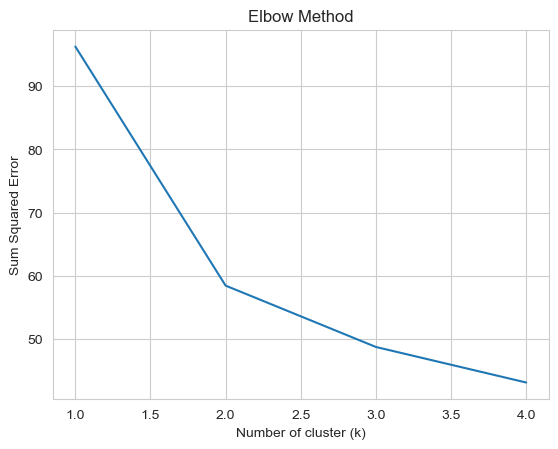

In [245]:
sse = []
for k in range(1,5):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(country_vt_df_scale_clean)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,5), y=sse)
g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')
plt.show()


In [246]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_1 = kmeans.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_1

array([2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2])

In [67]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

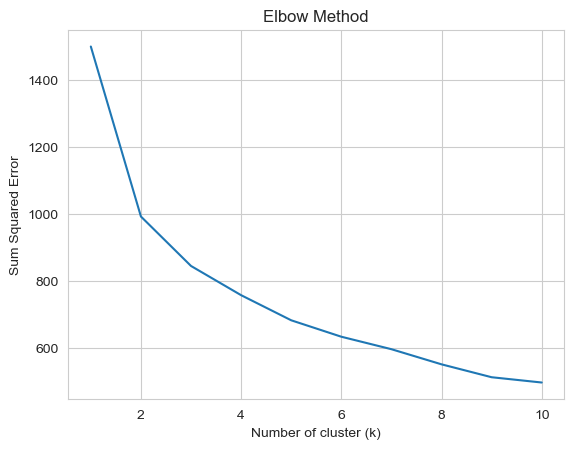

In [247]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(country_vt_df_scale_clean_std)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')
plt.show()


In [248]:
kmeans = KMeans(n_clusters = 5, random_state = 2)
kmeans.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_2 = kmeans.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_2

array([1, 0, 0, 0, 4, 0, 0, 2, 2, 0, 2, 4, 1, 2, 0, 4, 3, 1, 3, 0, 2, 3,
       0, 0, 4, 1, 1, 3, 1, 2, 3, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 4, 4,
       2, 0, 0, 0, 3, 0, 1, 4, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 4, 2, 1, 0, 0, 0, 4, 2, 2, 0, 2, 3, 0, 1, 3, 0, 3, 1, 4, 4, 3,
       3, 0, 4, 4, 3, 1, 1, 4, 4, 1, 4, 3, 4, 3, 3, 0, 4, 3, 1, 1, 3, 1,
       4, 2, 1, 1, 2, 0, 1, 4, 3, 0, 3, 2, 2, 0, 0, 0, 1, 3, 0, 1, 2, 4,
       1, 4, 4, 4, 3, 3, 4, 2, 0, 3, 1, 3, 2, 2, 1, 1, 4, 1, 3, 3, 3, 0,
       3, 1, 3, 4, 2, 2, 2, 1, 3, 0, 3, 1, 1])

In [249]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

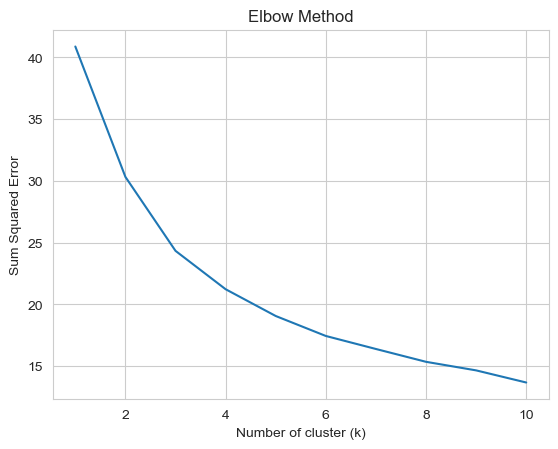

In [250]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(country_pca_df_scale_clean)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')
plt.show()


In [251]:
kmeans = KMeans(n_clusters = 5, random_state = 2)
kmeans.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_1 = kmeans.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_1

array([0, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 0,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 4, 4, 2, 4, 0, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 0, 2, 2, 0, 0,
       0, 1, 4, 2, 2, 4, 2, 1, 4, 4, 4, 4, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 0, 3, 3, 1, 1, 3, 3, 0, 3,
       1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       3, 1, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3])

In [252]:
print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_1.reshape(-1, 1), kmeans.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

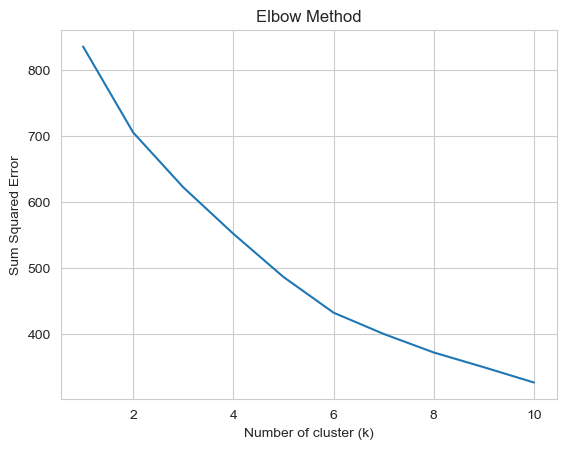

In [253]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(country_pca_df_scale_clean_std)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')
plt.show()


In [254]:
kmeans = KMeans(n_clusters = 6, random_state = 2)
kmeans.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_2 = kmeans.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_2

array([5, 3, 3, 2, 3, 3, 3, 4, 4, 2, 5, 2, 3, 3, 5, 0, 3, 3, 3, 3, 3, 5,
       4, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 4, 0,
       4, 3, 3, 3, 3, 2, 3, 0, 5, 4, 4, 2, 3, 3, 4, 3, 4, 5, 3, 3, 5, 5,
       5, 0, 4, 3, 3, 4, 2, 0, 4, 4, 3, 4, 0, 2, 1, 5, 2, 0, 1, 0, 0, 5,
       5, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 5, 0, 2, 0, 1, 1, 1, 5, 1,
       0, 4, 1, 2, 4, 2, 1, 0, 0, 1, 1, 4, 4, 2, 4, 2, 1, 1, 2, 1, 4, 0,
       1, 0, 0, 0, 0, 2, 4, 4, 1, 5, 1, 2, 4, 4, 1, 1, 0, 1, 1, 5, 0, 4,
       2, 1, 1, 2, 4, 4, 4, 1, 1, 1, 0, 1, 2])

In [255]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_2.reshape(-1, 1), kmeans.labels_))

Silhouette Score:  0.033646086180213065
Calinski-Harabasz Index: 27.784228336605572
Davies-Bouldin Index: 218.63270883787234


### Agglomerative Clustering

##### Variance Threshold

###### MinMax Scaling

In [52]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

In [256]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_ac_1 = ac.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_ac_1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [257]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))
#print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_db_1.reshape(-1, 1), kmeans.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

In [258]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_ac_2 = ac.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_ac_2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [259]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

In [260]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_ac_1 = ac.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_ac_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [261]:
print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_ac_1.reshape(-1, 1), ac.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

In [262]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_ac_2 = ac.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_ac_2

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [263]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_ac_2.reshape(-1, 1), ac.labels_))

Silhouette Score:  0.31315784476965974
Calinski-Harabasz Index: 47.87270736453778
Davies-Bouldin Index: 1.6206052974217553


### DBSCAN

##### Variance Threshold

###### MinMax Scaling

In [52]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

In [264]:
db = DBSCAN(eps=0.5, min_samples=20)
db.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_db_1 = db.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_db_1

array([-1,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0,
        0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,
       -1, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0,  0,
       -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1,  0,
        0, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1],
      dtype=int64)

In [265]:
print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_db_1, db.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 1.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

In [266]:
db = DBSCAN(eps=1, min_samples=30)
db.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_db_2 = db.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_db_2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [267]:
if len(np.unique(db.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_db_2, db.labels_))

Adjusted Rand Index: 1.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

In [268]:
db = DBSCAN(eps=0.5, min_samples=20)
db.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_db_1 = db.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_db_1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [269]:
if len(np.unique(db.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_db_1.reshape(-1, 1), db.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_db_1, db.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 0.018979194409599602


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

In [270]:
db = DBSCAN(eps=0.5, min_samples=20)
db.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_db_2 = db.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_db_2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [271]:
if len(np.unique(db.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_db_2.reshape(-1, 1), db.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_db_2, db.labels_))

Adjusted Rand Index: 1.0


### MeanShift

##### Variance Threshold

###### MinMax Scaling

In [52]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

In [272]:
ms = MeanShift()
ms.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_ms_1 = ms.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_ms_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [273]:
if len(np.unique(db.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_ms_1, ms.labels_))

Adjusted Rand Index: 1.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

In [274]:
ms = MeanShift()
ms.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_ms_2 = ms.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_ms_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [275]:
if len(np.unique(ms.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_ms_2, ms.labels_))

Adjusted Rand Index: 1.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

In [276]:
ms = MeanShift()
ms.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_ms_1 = ms.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_ms_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [277]:
if len(np.unique(ms.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_ms_1.reshape(-1, 1), ms.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_ms_1, ms.labels_))

Adjusted Rand Index: 1.0


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

In [278]:
ms = MeanShift()
ms.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_ms_2 = ms.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_ms_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [279]:
if len(np.unique(ms.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_ms_2.reshape(-1, 1), ms.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_ms_2, ms.labels_))

Adjusted Rand Index: 1.0


### SpectralClustering

##### Variance Threshold

###### MinMax Scaling

In [52]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

In [280]:
sc = SpectralClustering(n_clusters = 5, affinity ='rbf') 
#ms.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_sc_1 = sc.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_sc_1

array([1, 0, 0, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 1, 0, 0, 3, 3, 2, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 4, 3, 1, 2, 2, 2, 3, 3, 3, 0, 3, 4, 2, 1, 1, 2, 4, 1, 4, 4, 1,
       1, 2, 4, 3, 4, 1, 1, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 1, 1, 4, 1,
       3, 3, 1, 2, 3, 2, 2, 4, 4, 4, 4, 4, 3, 2, 4, 2, 1, 4, 2, 1, 4, 4,
       1, 4, 4, 3, 4, 4, 3, 3, 2, 4, 2, 4, 3, 3, 1, 1, 4, 2, 1, 4, 4, 4,
       4, 1, 4, 2, 3, 3, 4, 2, 4, 2, 4, 2, 1])

In [281]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_sc_1, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 1.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

In [282]:
sc = SpectralClustering(n_clusters = 5, affinity ='rbf') 
#ms.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_sc_2 = sc.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_sc_2

array([0, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 2, 0, 2, 2, 4, 2, 0, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 2, 0, 4, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 4, 2, 2,
       4, 2, 2, 2, 2, 1, 0, 2, 2, 4, 4, 2, 0, 2, 4, 0, 4, 2, 2, 0, 0, 2,
       0, 2, 4, 0, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 0, 2, 3, 2, 0, 2, 2, 2,
       2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       4, 4, 0, 0, 4, 3, 0, 2, 2, 2, 2, 2, 4, 3, 2, 2, 0, 2, 3, 0, 2, 2,
       0, 2, 2, 4, 2, 2, 4, 4, 2, 2, 0, 2, 4, 4, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 3, 4, 4, 2, 0, 2, 2, 2, 0, 0])

In [283]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_sc_2, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 1.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

In [284]:
sc = SpectralClustering(n_clusters = 3, affinity ='rbf')
#ms.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_sc_1 = sc.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_sc_1

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [285]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_sc_1, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 0.3712799483868557


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

In [286]:
sc = SpectralClustering(n_clusters = 3, affinity ='rbf')
#ms.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_sc_2 = sc.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_sc_2

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [287]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_sc_2, sc.labels_))

Silhouette Score:  -0.03889427068379959
Calinski-Harabasz Index: 76.29407706297168
Davies-Bouldin Index: 1.7633122552645615
Adjusted Rand Index: 0.22141622785798365


##### Variance Threshold

###### MinMax Scaling

In [52]:
country_vt_df_scale_clean = knn_imputer.fit_transform(country_vt_df_scale)

In [288]:
sc = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') 
#ms.fit(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_sc_1 = sc.fit_predict(country_vt_df_scale_clean)
country_vt_df_scale_clean_pred_sc_1

array([2, 1, 1, 4, 1, 1, 1, 0, 0, 4, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 4, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 4, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 4, 2, 1, 1, 0, 0, 4, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 3, 0, 2, 4, 4, 4, 0, 0, 0, 1, 0, 1, 4, 2, 2, 4, 2, 2, 3, 3, 2,
       2, 4, 3, 0, 3, 2, 2, 3, 3, 2, 0, 2, 3, 2, 3, 4, 3, 3, 2, 2, 3, 2,
       0, 0, 2, 2, 0, 4, 2, 3, 3, 3, 3, 3, 0, 4, 3, 4, 2, 3, 4, 2, 3, 3,
       2, 4, 3, 0, 3, 3, 0, 0, 4, 3, 2, 3, 0, 0, 2, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 3, 4, 0, 0, 3, 2, 3, 4, 3, 2, 2])

In [289]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_sc_1, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 1.0


###### Standard Scaling

In [68]:
country_vt_df_scale_clean_std = knn_imputer.fit_transform(country_vt_df_scale_2)

In [290]:
sc = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') 
#ms.fit(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_sc_2 = sc.fit_predict(country_vt_df_scale_clean_std)
country_vt_df_scale_clean_pred_std_sc_2

array([1, 2, 2, 2, 3, 2, 2, 4, 4, 2, 3, 0, 1, 3, 2, 0, 3, 1, 3, 2, 3, 2,
       2, 0, 3, 1, 1, 3, 1, 4, 3, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 3, 0, 0,
       4, 2, 2, 2, 3, 2, 1, 0, 3, 4, 4, 2, 1, 3, 4, 1, 4, 3, 2, 1, 1, 3,
       1, 0, 4, 1, 2, 2, 2, 0, 4, 4, 2, 4, 3, 2, 1, 3, 0, 3, 1, 0, 3, 3,
       3, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 2, 3, 3, 1, 1, 3, 1,
       0, 4, 1, 1, 4, 0, 1, 0, 3, 2, 3, 3, 4, 0, 3, 2, 1, 3, 0, 1, 3, 0,
       1, 0, 0, 0, 3, 1, 4, 4, 2, 3, 1, 3, 4, 4, 1, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 3, 0, 4, 4, 3, 1, 3, 2, 3, 1, 1])

In [291]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_sc_2, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 1.0


##### PCA

###### MinMax Scaling

In [73]:
country_pca_df_scale_clean = knn_imputer.fit_transform(country_pca_df_scale)

In [292]:
sc = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
#ms.fit(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_sc_1 = sc.fit_predict(country_pca_df_scale_clean)
country_pca_df_scale_clean_pred_sc_1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0])

In [293]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_pca_df_scale_clean_pred_sc_1.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_sc_1, sc.labels_))

Silhouette Score:  1.0
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 0.0
Adjusted Rand Index: 0.3773939738643252


###### Standard Scaling

In [78]:
country_pca_df_scale_clean_std = knn_imputer.fit_transform(country_pca_df_scale_2)

In [294]:
sc = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
#ms.fit(country_vt_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_sc_2 = sc.fit_predict(country_pca_df_scale_clean_std)
country_pca_df_scale_clean_pred_std_sc_2

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2])

In [295]:
if len(np.unique(sc.labels_))>1:
    print("Silhouette Score: ",silhouette_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
    print("Davies-Bouldin Index:", davies_bouldin_score(country_vt_df_scale_clean_pred_std_sc_2.reshape(-1, 1), sc.labels_))
print("Adjusted Rand Index:" , adjusted_rand_score(country_vt_df_scale_clean_pred_std_sc_2, sc.labels_))

Silhouette Score:  0.03303649971715821
Calinski-Harabasz Index: 8.118373602042174
Davies-Bouldin Index: 10.468691048528255
Adjusted Rand Index: 0.22398027175941446
